In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


In [2]:
merged_path = './merged_lexicon.csv'
merged = pd.read_csv(merged_path)  
test_path = './Data/olid-test.csv'
test = pd.read_csv(test_path)  
pd.set_option('display.max_colwidth', None)

# Design a (simple) lexicon-lookup approach

In [3]:
merged

,unit,hate-label
0,%e2%80%99ndrangheta,0
1,'ndrangheta,0
2,"(0, 0, 0)",1
3,(to get) dumped,0
4,(white) trash,0
...,...,...
12465,👮,0
12466,👶,1
12467,💢,1
12468,🚻,1


In [4]:
test.head()

,id,text,labels
0,15923,"#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL",1
1,27014,"#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.",0
2,30530,"#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER @USER @USER @USER @USER #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER First, it reduces the ca URL",0
3,13876,#Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL,0
4,60133,#NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL,1


In [5]:
# The string you want to check for
target_string = 'hated'

# Check if 'target_string' is in 'column_name' and get True or False
result = merged['unit'].str.contains(target_string).any()

print(result)

True


# Run this approach with the 4 lexicons

In [6]:
# Load the merged lexicon (from Step 3)
merged_lexicon = pd.read_csv('./merged_lexicon.csv')
# Drop instances where 'hate-label' is equal to 0
merged_lexicon = merged_lexicon[merged_lexicon['hate-label'] != 0]

# Load the OLID test dataset
test_data = pd.read_csv('./Data/olid-test.csv')


[[345 275]
 [ 77 163]]


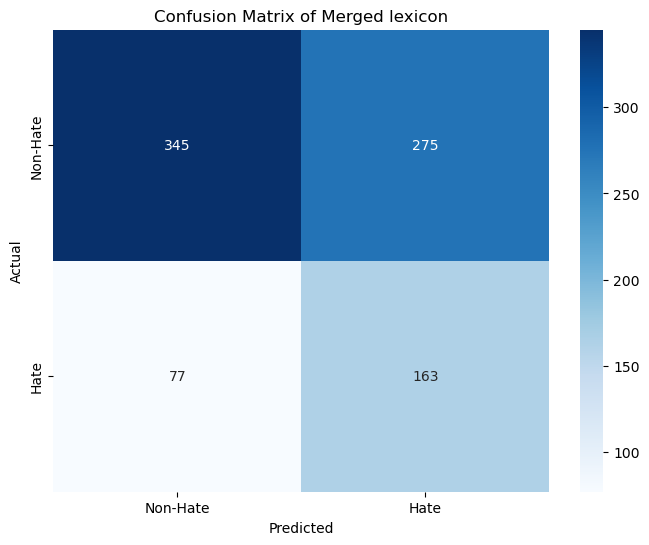

Classification Report for Merged lexicon:

              precision    recall  f1-score   support

    Non-Hate       0.82      0.56      0.66       620
        Hate       0.37      0.68      0.48       240

    accuracy                           0.59       860
   macro avg       0.59      0.62      0.57       860
weighted avg       0.69      0.59      0.61       860



,Text,True_Labels,Predicted_Labels,Detected_Tokens
0,"#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL",1,0,
1,"#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.",0,1,hated
2,"#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER @USER @USER @USER @USER #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER First, it reduces the ca URL",0,0,
3,#Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL,0,0,
4,#NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL,1,0,
...,...,...,...,...
855,#DespicableDems lie again about rifles. Dem Distorted the Law to Push Gun-Control at Kavanaugh Confirmation URL via @USER,1,1,"lie, distorted, push"
856,#MeetTheSpeakers 🙌 @USER will present in our event OIW 2018: Finpact - Global Impact through Financial Technologies. She is Senior Advisor Group Sustainable Finance and worked on green energy and climate risk. Join us to meet Thina URL #oiw2018 URL,0,1,green
857,3 people just unfollowed me for talking about merlin sorry y'all im still up covinsky's ass im just waiting for a psisly sequel announcement ive run out of witty and funny tweets about tatbilb i am drained,1,1,"people, ass"
858,"#WednesdayWisdom Antifa calls the right fascist when, in all reality, they and the left are following the same scenario as the Third Reich: indoctrination of our youth, trying to control minorities and a total lack of understanding or knowledge of history. #WalkAway",0,1,"fascist, lack"


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def lexicon_lookup_and_evaluate(text_column, labels_column, lexicon, column_name=None, name=None):
    """
    Perform lexicon-based hate speech identification and evaluate the results.

    Parameters:
        text_column (pd.Series): The column containing the input text to classify.
        labels_column (pd.Series): The column containing the true labels (0 for non-hate, 1 for hate).
        lexicon (pd.DataFrame): The merged lexicon containing hate speech terms and labels.
        column_name (str): The column name in the lexicon DataFrame.
        name (str): Name to be added to Confusion Matrix.

    Returns:
        pd.DataFrame: A DataFrame containing the original text, true labels, predicted labels,
                      detected tokens, and the confusion matrix.
    """
    # Create a DataFrame to store results
    results_df = pd.DataFrame({'Text': text_column, 'True_Labels': labels_column})

    # Define a function for lexicon-based hate speech identification
    def lexicon_lookup(text, lexicon):
        tokens = text.lower().split()  # Convert to lowercase for case-insensitive matching
        detected_tokens = []  # To store tokens detected as hate speech
        for token in tokens:
            if token in lexicon[column_name].values:
                detected_tokens.append(token)
        if detected_tokens:
            return 1, ', '.join(detected_tokens)  # Hate speech detected and list of detected tokens
        else:
            return 0, ''  # Non-hate speech and empty token list

    # Apply the lexicon-lookup approach to the text data
    results_df['Predicted_Labels'], results_df['Detected_Tokens'] = zip(*text_column.apply(lambda x: lexicon_lookup(x, lexicon)))

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(results_df['True_Labels'], results_df['Predicted_Labels'])
    print(conf_matrix)

    # Create a confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Hate', 'Hate'],
                yticklabels=['Non-Hate', 'Hate'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of ' + name)
    plt.show()

    # Generate a classification report
    report = classification_report(results_df['True_Labels'], results_df['Predicted_Labels'], target_names=['Non-Hate', 'Hate'])

    # Print the classification report
    print("Classification Report for " + name + ":\n")
    print(report)

    return results_df

# Example usage:
lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], merged_lexicon, column_name='unit', name="Merged lexicon")


In [8]:
# Define the path to the base lexicon file
path = r"../Assignment 3 - Group 11/Data/lexicon-of-abusive-words-master/Lexicons/"

featur_base_lexicon_path = path + "expandedLexicon.txt"
df_featur_base_lexicon = pd.read_csv(featur_base_lexicon_path, sep='\t', header=None, names=["word", "label"], encoding="utf-8")
df_featur_base_lexicon.head()
df_featur_base_lexicon['word'] = df_featur_base_lexicon['word'].str.replace(r'_[a-zA-Z]+$', '', regex=True)

# Drop instances where 'label' is less than or equal to 0
df_featur_base_lexicon = df_featur_base_lexicon[df_featur_base_lexicon['label'] > 0]
df_featur_base_lexicon.head()

,word,label
0,horrible,3.679601
1,disgusting,3.493682
2,moron,3.469677
3,bastard,3.399238
4,stupid,3.323882


[[567  53]
 [137 103]]


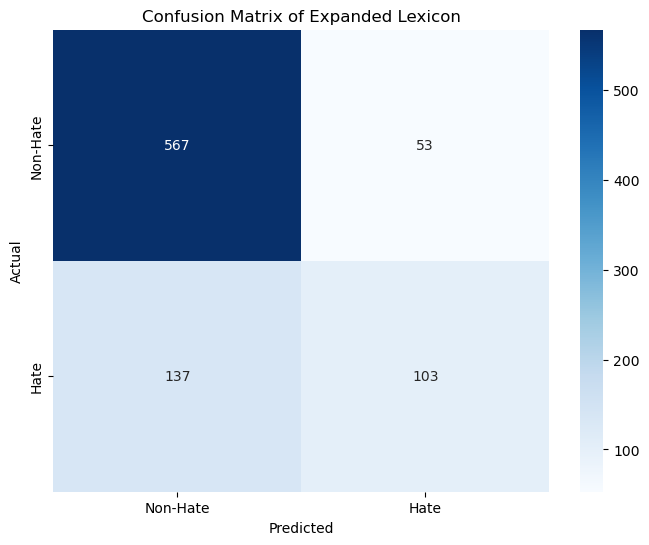

Classification Report for Expanded Lexicon:

              precision    recall  f1-score   support

    Non-Hate       0.81      0.91      0.86       620
        Hate       0.66      0.43      0.52       240

    accuracy                           0.78       860
   macro avg       0.73      0.67      0.69       860
weighted avg       0.76      0.78      0.76       860



,Text,True_Labels,Predicted_Labels,Detected_Tokens
0,"#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL",1,0,
1,"#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.",0,1,hated
2,"#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER @USER @USER @USER @USER #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER First, it reduces the ca URL",0,0,
3,#Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL,0,0,
4,#NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL,1,0,
...,...,...,...,...
855,#DespicableDems lie again about rifles. Dem Distorted the Law to Push Gun-Control at Kavanaugh Confirmation URL via @USER,1,0,
856,#MeetTheSpeakers 🙌 @USER will present in our event OIW 2018: Finpact - Global Impact through Financial Technologies. She is Senior Advisor Group Sustainable Finance and worked on green energy and climate risk. Join us to meet Thina URL #oiw2018 URL,0,0,
857,3 people just unfollowed me for talking about merlin sorry y'all im still up covinsky's ass im just waiting for a psisly sequel announcement ive run out of witty and funny tweets about tatbilb i am drained,1,1,ass
858,"#WednesdayWisdom Antifa calls the right fascist when, in all reality, they and the left are following the same scenario as the Third Reich: indoctrination of our youth, trying to control minorities and a total lack of understanding or knowledge of history. #WalkAway",0,1,fascist


In [12]:
lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], df_featur_base_lexicon , column_name='word', name = "Expanded Lexicon")


In [13]:
path= r"../Assignment 3 - Group 11/Data/"
hurtlex_EN = path+"hurtlex_EN.tsv"

# Read the TSV file into a DataFrame
df_hurtlex_EN = pd.read_csv(hurtlex_EN, sep='\t', encoding='utf-8')
df_hurtlex_EN

,id,pos,category,stereotype,lemma,level
0,EN1382,n,qas,no,gag reel,inclusive
1,EN7077,a,cds,no,snotty,conservative
2,EN6856,n,is,yes,mendicant,conservative
3,EN5485,n,re,no,maffias,conservative
4,EN5024,n,cds,no,lying in trade,conservative
...,...,...,...,...,...,...
8223,EN7899,n,an,no,perosuchus,inclusive
8224,EN1319,n,cds,no,mother fucka,conservative
8225,EN2597,n,cds,no,refuse,conservative
8226,EN521,n,asm,no,simple,inclusive


[[356 264]
 [ 86 154]]


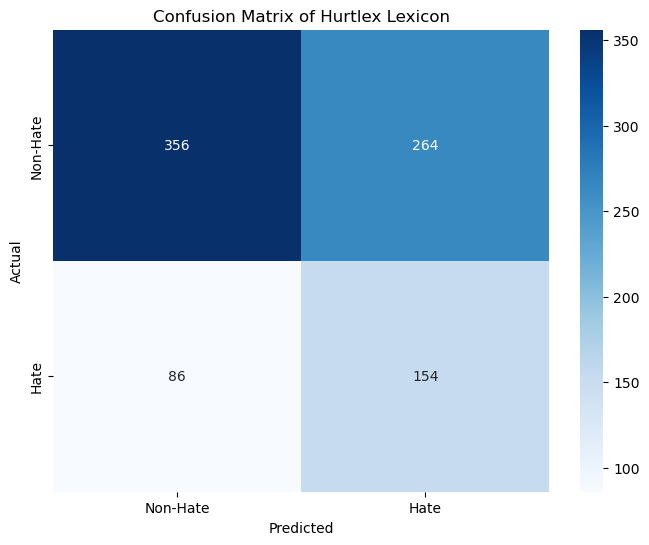

Classification Report for Hurtlex Lexicon:

              precision    recall  f1-score   support

    Non-Hate       0.81      0.57      0.67       620
        Hate       0.37      0.64      0.47       240

    accuracy                           0.59       860
   macro avg       0.59      0.61      0.57       860
weighted avg       0.68      0.59      0.61       860



,Text,True_Labels,Predicted_Labels,Detected_Tokens
0,"#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL",1,0,
1,"#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.",0,0,
2,"#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER @USER @USER @USER @USER #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER First, it reduces the ca URL",0,0,
3,#Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL,0,0,
4,#NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL,1,0,
...,...,...,...,...
855,#DespicableDems lie again about rifles. Dem Distorted the Law to Push Gun-Control at Kavanaugh Confirmation URL via @USER,1,1,"lie, distorted"
856,#MeetTheSpeakers 🙌 @USER will present in our event OIW 2018: Finpact - Global Impact through Financial Technologies. She is Senior Advisor Group Sustainable Finance and worked on green energy and climate risk. Join us to meet Thina URL #oiw2018 URL,0,1,green
857,3 people just unfollowed me for talking about merlin sorry y'all im still up covinsky's ass im just waiting for a psisly sequel announcement ive run out of witty and funny tweets about tatbilb i am drained,1,1,"people, ass"
858,"#WednesdayWisdom Antifa calls the right fascist when, in all reality, they and the left are following the same scenario as the Third Reich: indoctrination of our youth, trying to control minorities and a total lack of understanding or knowledge of history. #WalkAway",0,1,fascist


In [15]:
lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], df_hurtlex_EN , column_name='lemma', name = "Hurtlex Lexicon")


In [17]:
path= r"../Assignment 3 - Group 11/Data/"
mol =path+"mol.csv"

# Read the csv file into a DataFrame
df_mol = pd.read_csv(mol)

# Drop rows where en-hate-label is equal to not 0
df_mol = df_mol[df_mol['en-hate-label'] != '0']

# Display the first few rows
df_mol

,term-or-expression,explicit-or-implicit,pt-brazilian-portuguese,pt-contextual-label,pt-hate-label,pt-deeply-culture-rooted,en-american-english,en-contextual-label,en-hate-label,es-latin-spanish,...,fr-african-french,fr-contextual-label,fr-hate-Label,ge-german,ge-contextual-label,ge-hate-Label,tu-turkish,tu-contextual-label,tu-hate-Label,Meaning Sources
5,term,explicit,vagabunda,1.0,sexism,0.0,slut,1.0,sexism,prostituta,...,salope,1.0,sexism,Schlampe,1.0,sexism,orospu,1.0,sexism,"https://www.dicio.com.br/vagabunda/#:~:text=Significado%20de%20Vagabunda,embora%20n%C3%A3o%20viva%20da%20prostitui%C3%A7%C3%A3o."
6,term,explicit,vagaba,1.0,sexism,0.0,slut,1.0,sexism,prostituta,...,garce,1.0,sexism,Schlampe,1.0,sexism,orospu,1.0,sexism,"https://www.dicio.com.br/vagabunda/#:~:text=Significado%20de%20Vagabunda,embora%20n%C3%A3o%20viva%20da%20prostitui%C3%A7%C3%A3o."
24,term,explicit,familicia,1.0,partyism,1.0,0,1.0,partyism,0,...,0,1.0,partyism,0,1.0,partyism,0,1.0,partyism,"""term used to refer to Bolsonaro's family"""
53,term,explicit,petesada,1.0,partyism,1.0,libtard,1.0,partyism,0,...,0,1.0,partyism,0,1.0,partyism,0,1.0,partyism,"""term used in a pejorative way to refer to people from the left (also known as democrats) party in Brazil"""
57,term,explicit,bolsomerda,1.0,partyism,1.0,0,1.0,partyism,0,...,0,1.0,partyism,0,1.0,partyism,0,1.0,partyism,"""a term used in Brazil and derived from agglutination process between -Bolsonaro- and -merda- (shit)"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,term,explicit,trevas,0.0,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,term,explicit,laia,1.0,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,term,explicit,larapio,1.0,0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,term,explicit,pior,0.0,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[[601  19]
 [207  33]]


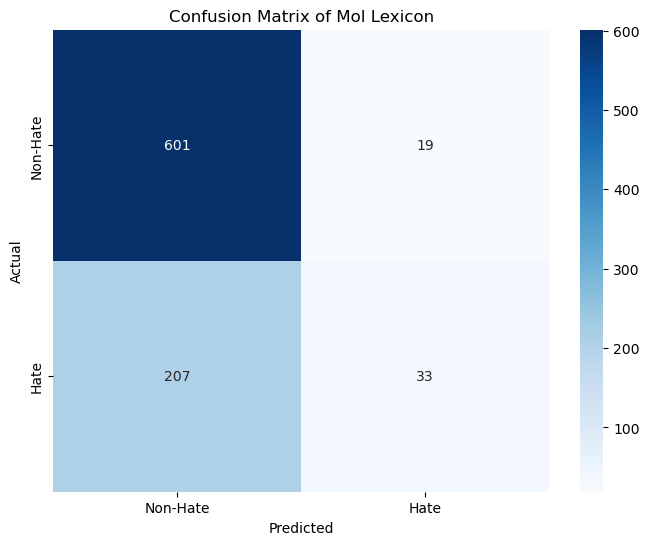

Classification Report for Mol Lexicon:

              precision    recall  f1-score   support

    Non-Hate       0.74      0.97      0.84       620
        Hate       0.63      0.14      0.23       240

    accuracy                           0.74       860
   macro avg       0.69      0.55      0.53       860
weighted avg       0.71      0.74      0.67       860



,Text,True_Labels,Predicted_Labels,Detected_Tokens
0,"#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL",1,0,
1,"#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.",0,0,
2,"#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER @USER @USER @USER @USER #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER First, it reduces the ca URL",0,0,
3,#Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL,0,0,
4,#NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL,1,0,
...,...,...,...,...
855,#DespicableDems lie again about rifles. Dem Distorted the Law to Push Gun-Control at Kavanaugh Confirmation URL via @USER,1,0,
856,#MeetTheSpeakers 🙌 @USER will present in our event OIW 2018: Finpact - Global Impact through Financial Technologies. She is Senior Advisor Group Sustainable Finance and worked on green energy and climate risk. Join us to meet Thina URL #oiw2018 URL,0,0,
857,3 people just unfollowed me for talking about merlin sorry y'all im still up covinsky's ass im just waiting for a psisly sequel announcement ive run out of witty and funny tweets about tatbilb i am drained,1,0,
858,"#WednesdayWisdom Antifa calls the right fascist when, in all reality, they and the left are following the same scenario as the Third Reich: indoctrination of our youth, trying to control minorities and a total lack of understanding or knowledge of history. #WalkAway",0,1,fascist


In [18]:
lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], df_mol , column_name='en-american-english', name = "Mol Lexicon")
